In [20]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [21]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [22]:
Tickers = cac40.iloc[[12,34], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['ENGI.PA', 'TTE.PA']

In [23]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [25]:
data_1 = yf.Ticker(symbols[0])
data_2 = yf.Ticker(symbols[1])

Engie = data_1.history(interval ='1d', start = '2013-5-30', end = '2023-5-30')
Total = data_2.history(interval ='1d', start = '2013-5-30', end = '2023-5-30')

In [14]:
Engie = Engie[['Close']]
Total = Total[['Close']]

In [26]:
returns_Engie = np.log(Engie['Close'] / Engie['Close'].shift(1)).dropna()
returns_Total = np.log(Total['Close'] / Total['Close'].shift(1)).dropna()

Text(0.5, 1.0, 'Engie Returns')

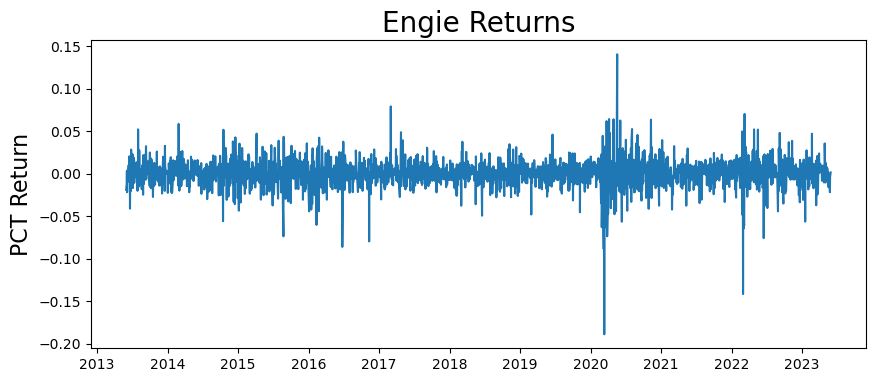

In [27]:
plt.figure(figsize=(10,4))
plt.plot(returns_Engie)
plt.ylabel('PCT Return', fontsize=16)
plt.title('Engie Returns', fontsize=20)

Text(0.5, 1.0, 'Total Returns')

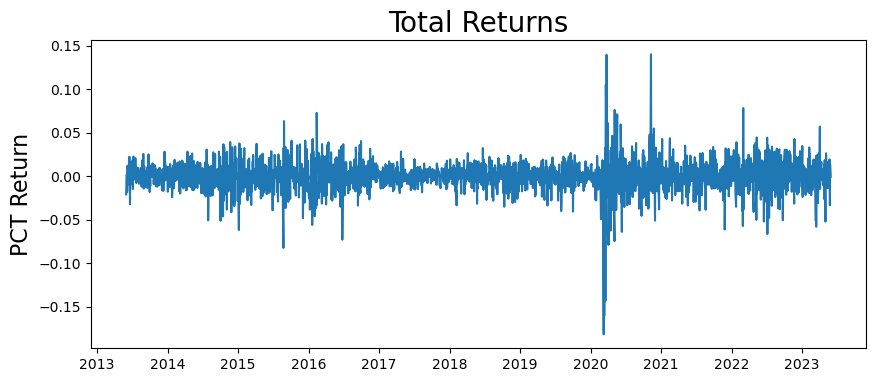

In [28]:
plt.figure(figsize=(10,4))
plt.plot(returns_Total)
plt.ylabel('PCT Return', fontsize=16)
plt.title('Total Returns', fontsize=20)

We can clearly see for both 3 graphs that they are periods of much higher volatility than other periods (volatility clustering).

Especially in 2020, due to the coronavirus pandemic.

So this 2 stock vaues return are good candidates for GARCH modelling.

**GARCH model:**

GARCH stends for Generalized Auto Regressive Conditional Heteroscedasticity. A GARCH model is used to capture volatility clustering in stock prices time series. The goal of this model is to provide a volatility measure –like a standard deviation– that can be used in financial decisions.


**PACF**

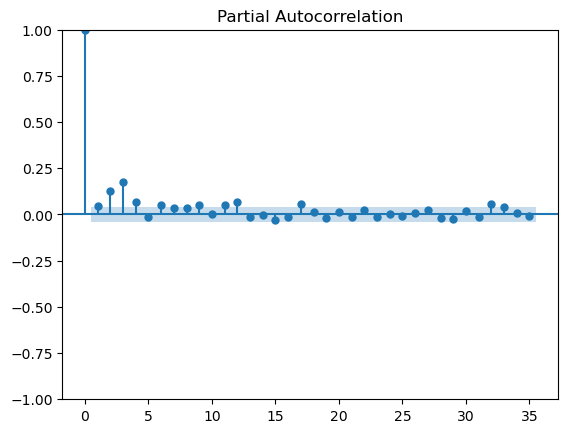

In [66]:
plot_pacf(returns_Engie**2);

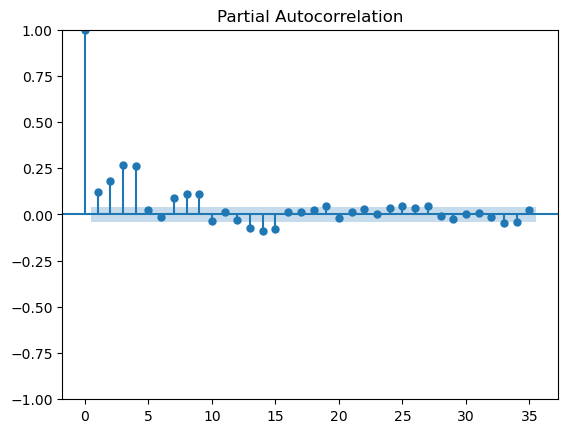

In [67]:
plot_pacf(returns_Total**2);

**Fit GARCH Model**

In [68]:
from arch import arch_model

In [69]:
# Engie

model = arch_model(returns_Engie, p = 3, q=3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 17009077851.472395
Iteration:      2,   Func. Count:     26,   Neg. LLF: -5061.028246460119
Iteration:      3,   Func. Count:     39,   Neg. LLF: -6649.285768171618
Iteration:      4,   Func. Count:     50,   Neg. LLF: 5716609.284729475
Iteration:      5,   Func. Count:     61,   Neg. LLF: -6859.712993843756
Iteration:      6,   Func. Count:     72,   Neg. LLF: -6972.8879429360395
Iteration:      7,   Func. Count:     82,   Neg. LLF: -6901.369296599172
Iteration:      8,   Func. Count:     93,   Neg. LLF: -7164.27274002316
Iteration:      9,   Func. Count:    103,   Neg. LLF: -7006.959627721279
Iteration:     10,   Func. Count:    113,   Neg. LLF: -7173.442032724257
Iteration:     11,   Func. Count:    124,   Neg. LLF: -7182.959427728727
Iteration:     12,   Func. Count:    134,   Neg. LLF: -7188.823642363135
Iteration:     13,   Func. Count:    143,   Neg. LLF: -7188.7731946659105
Iteration:     14,   Func. Count:    153,   Neg. LL

In [70]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7189.22
Distribution:                  Normal   AIC:                          -14362.4
Method:            Maximum Likelihood   BIC:                          -14315.7
                                        No. Observations:                 2560
Date:                Wed, May 31 2023   Df Residuals:                     2559
Time:                        15:51:56   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.9244e-04  2.796e-04      1.761  7.823e-02 [-5.562e-05,1.041e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.9535e-05  4.745e-06      8.332  7.924e-17 [3.024e-05,4.883e-05]
alpha[1]       0.0690  4.120e-02      1.676  9.379e-02  [-1.171e-02,  0.150]
alpha[2]       0.0453  3.176e-02      1.427      0.154  [-1.693e-02,  0.108]
alpha[3]       0.1549  5.867e-02      2.640  8.290e-03   [3.990e-02,  0.270]
beta[1]        0.0749      0.246      0.305      0.760     [ -0.407,  0.557]
beta[2]        0.0000      0.652      0.000      1.000     [ -1.277,  1.277]
beta[3]        0.5006      0.850      0.589      0.556     [ -1.165,  2.166]
============================================================================

Covariance estimator: robust
"""

**Try GARCH(3,0) = ARCH(3)**

In [71]:
model = arch_model(returns_Engie, p=3, q=0)

In [72]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1579968545.7791789
Iteration:      2,   Func. Count:     20,   Neg. LLF: 458702615.2416093
Iteration:      3,   Func. Count:     33,   Neg. LLF: 5.569783522367542e+18
Iteration:      4,   Func. Count:     46,   Neg. LLF: 1.1634218974928955e+18
Iteration:      5,   Func. Count:     59,   Neg. LLF: 1.653967126716829e+17
Iteration:      6,   Func. Count:     72,   Neg. LLF: 5.719438844061618e+18
Iteration:      7,   Func. Count:     86,   Neg. LLF: 2.289355524752261e+16
Iteration:      8,   Func. Count:     99,   Neg. LLF: 387100175.4934685
Iteration:      9,   Func. Count:    113,   Neg. LLF: -7065.121628106733
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7065.121613852632
            Iterations: 13
            Function evaluations: 113
            Gradient evaluations: 9


In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                7065.12
Distribution:                  Normal   AIC:                          -14120.2
Method:            Maximum Likelihood   BIC:                          -14091.0
                                        No. Observations:                 2560
Date:                Wed, May 31 2023   Df Residuals:                     2559
Time:                        15:52:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.4140e-04  3.047e-04      1.449      0.147 [-1.558e-04,1.039e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.2906e-04  8.498e-06     15.186  4.377e-52 [1.124e-04,1.457e-04]
alpha[1]       0.0667  2.129e-02      3.132  1.736e-03   [2.495e-02,  0.108]
alpha[2]       0.0667  2.243e-02      2.972  2.963e-03   [2.270e-02,  0.111]
alpha[3]       0.0667  2.132e-02      3.127  1.767e-03   [2.488e-02,  0.108]
============================================================================

Covariance estimator: robust
"""

All the coefficients are significants (p-value < 0.05)

In [61]:
rolling_predictions = []
test_size = 500

for i in range(test_size):
    train = returns_Engie[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [62]:
rolling_predictions = pd.Series(rolling_predictions, index=returns_Engie.index[-500:])

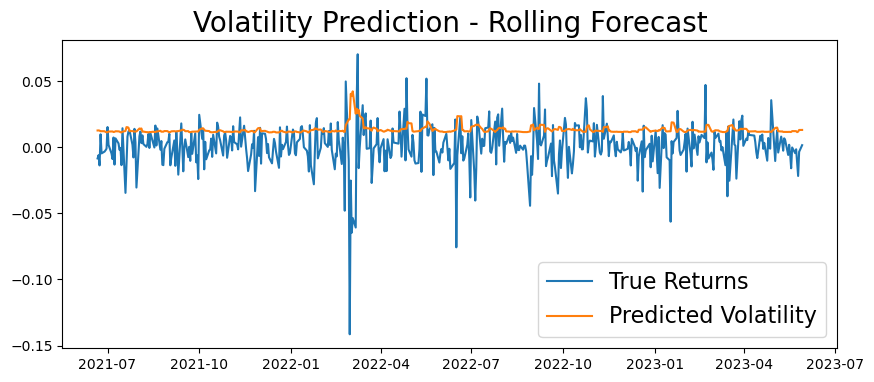

In [63]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns_Engie[-500:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [74]:
# The orange line is the prediction of the GARCH process (volatility)
# Not the best model

In [77]:
train = returns_Engie
model = arch_model(train, p=3, q=0)
model_fit = model.fit(disp='off')

In [78]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns_Engie.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

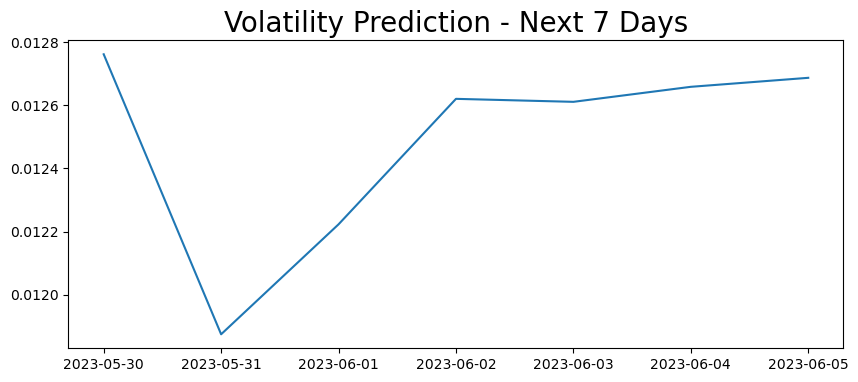

In [79]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [64]:
# Total

model = arch_model(returns_Total, p = 4, q=4)
model_fit = model.fit()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 36494607323.32272
Iteration:      2,   Func. Count:     30,   Neg. LLF: 482169103.5314861
Iteration:      3,   Func. Count:     48,   Neg. LLF: 171852516.41567233
Iteration:      4,   Func. Count:     66,   Neg. LLF: 1251201170.7296207
Iteration:      5,   Func. Count:     84,   Neg. LLF: 1091085.165486753
Iteration:      6,   Func. Count:    102,   Neg. LLF: 23373169.118312024
Iteration:      7,   Func. Count:    121,   Neg. LLF: 29021472.502267905
Iteration:      8,   Func. Count:    141,   Neg. LLF: 29378.378960465576
Iteration:      9,   Func. Count:    158,   Neg. LLF: 122984728.40683977
Iteration:     10,   Func. Count:    177,   Neg. LLF: 674851.7848178524
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7150.693337281467
            Iterations: 14
            Function evaluations: 185
            Gradient evaluations: 10


In [65]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7150.69
Distribution:                  Normal   AIC:                          -14281.4
Method:            Maximum Likelihood   BIC:                          -14222.9
                                        No. Observations:                 2560
Date:                Wed, May 31 2023   Df Residuals:                     2559
Time:                        15:42:05   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.5438e-04  6.454e-05      8.589  8.755e-18 [4.279e-04,6.809e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.0972e-06  3.020e-10  2.019e+04      0.000 [6.097e-06,6.098e-06]
alpha[1]       0.0500  3.600e-02      1.389      0.165  [-2.055e-02,  0.121]
alpha[2]       0.0500  3.398e-02      1.472      0.141  [-1.660e-02,  0.117]
alpha[3]       0.0500  5.677e-02      0.881      0.378  [-6.126e-02,  0.161]
alpha[4]       0.0500  5.173e-02      0.967      0.334  [-5.138e-02,  0.151]
beta[1]        0.1950      1.051      0.186      0.853     [ -1.865,  2.255]
beta[2]        0.1950      0.687      0.284      0.777     [ -1.152,  1.542]
beta[3]        0.1950      0.897      0.217      0.828     [ -1.563,  1.953]
beta[4]        0.1950      0.567      0.344      0.731     [ -0.917,  1.307]
============================================================================

Covariance estimator: robust
"""

No coefficient is significant